# TSNE 


**5. [0-7 points] Consider the dataset parkinson.csv, including 756 samples (rows) described by 754 features (columns), plus the last binary column (class) indicating whether the sample is a patient (class 1) or an healthy control (class 0). Using a dimensionality reduction planar projection on the 754 describing features (using the method you rate as the most adequate), color the samples according to their class and discuss if the patients and controls can be separated into two distinct groups in the projection.**

**Step 1: Importing the libraries**

In [7]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import csv
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

%matplotlib inline

**Step 2: Importing the data set Import the dataset and distributing the dataset into X and y components for data analysis.**

In [8]:
df = pd.read_csv("parkinson.csv")
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [11]:
# define x 
x = df.iloc[: , :-1]
# define target variable: select last column
y = df.iloc[: , -1].values
unique, counts = np.unique(y, return_counts=True)
classes = len(counts)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

In [13]:
tsne = TSNE(n_components=classes, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 756 samples in 0.001s...
[t-SNE] Computed neighbors for 756 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 756 / 756
[t-SNE] Mean sigma: 7.274395
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.554047
[t-SNE] KL divergence after 300 iterations: 0.998825


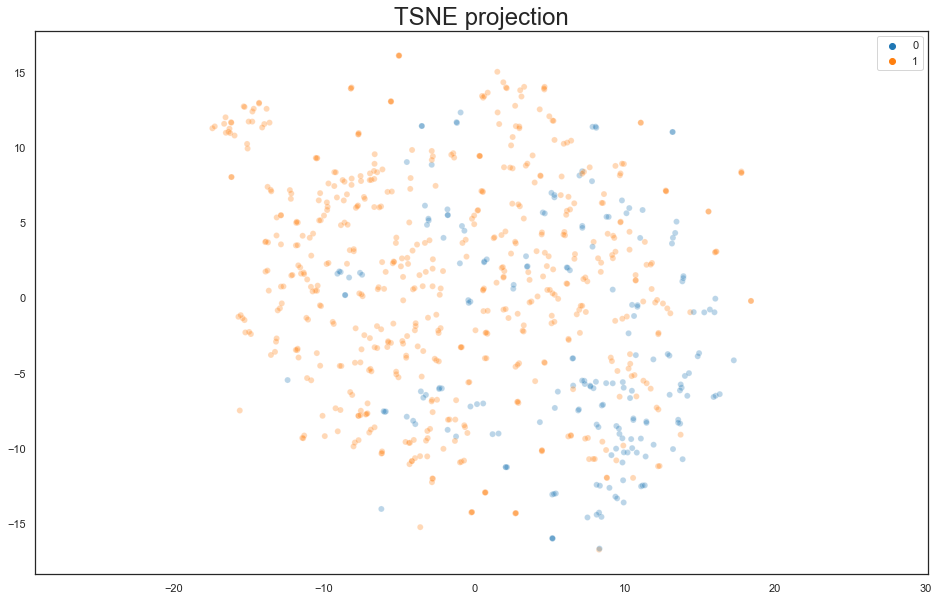

In [19]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x = tsne_results[:, 0],
                y = tsne_results[:, 1],
                hue = y,
                palette = sns.color_palette('tab10', classes),
                legend = 'full',
                alpha = 0.3)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(bbox_to_anchor = (1, 1))
plt.title('TSNE projection', fontsize=24)
plt.show()